## Task 2 - Housing Loan

## Business Understanding (2nd Variable)

The team decided that the variable housing would be of interest to the banks as this could be an avenue for additional revenue for the industry.  Individuals and families that own homes could be swayed into refinancing homes for a lower interest rate or need other loans to pay for home improvements.  These transactions, though benefiting the home owner in the short term, in the long run banks do benefit additionally with fees and service transactions that must be paid.

The housing variable is a binary response that is balanced in our sampled data set (the population of the bank clients that have a home loan are unknown).  The variable represents if the client has or does not have a home loan.

From the figure 1 we can see several trends happening during the time of the data set (ref: https://tradingeconomics.com/portugal):
- Household savings increasing
- Bank lending decreasing
- Average wage increasing
- Consumer spending decreasing

_Figure 1:_

![alt text](https://github.com/nhendersonkuns/awesomedataminers/raw/master/ReferenceMaterial/HousingReasons.PNG "Key Indicators")

During the time of the marketing campaign, a global recession occurred (figure 2).  We inferred that to prepare for the possiblity of upcoming hardships, many individuals/families would have attemped to save more of their disposable income.  The above charts yields us to that inference.  The banks could use this data to direct resources in an attempt to help these home owners refinance and save additional disposable income.  This helps out the customers in the short term and helps out the bank in the long term now that they have gained customers and revenue from interest payments. 

_Figure 2:_
![alt text](https://github.com/nhendersonkuns/awesomedataminers/raw/master/ReferenceMaterial/StockMarketCompare.PNG "US vs Portugal Stock")

In this task, we are predicting whether a bank client has a housing loan. 56% of the clients in this data set have housing loan and the remaining 44% do not, which  dataset is closely balanced for this task. We used accuracy  to evaluate the model performance and select the model parameters.

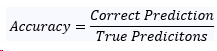


From a business standpoint, it is equally important to know who has a loan or not. Banks could offer additional promotions regarding home refinancing for customers who have housing loans.  Similarly, if the bank wants to attract new home owners, they can contact people who do not have housing loans. Correct prediction is more important for this model and accuracy is chosen as a metric to evaluate the models.
This will be followed by AuC scores, as accuracy is  calculated at a threshold value of 0.5.  In real life, the probability of the population having a housing loan is not 50-50.  This data set was collected at time of economic recession, so it is  likely that prior probabilities of people having housing loan were not at 50-50 level. (reference:  https://tradingeconomics.com/portugal/home-ownership-rate shows in 2010 the home ownership rate was ~75%, no 2008-2009 data was found) . Hence, AuC score (in conjunction to ROC curve) score which basically provides accuracies at different threshold values, would overall provide a better measure of model performance.


### 

In [2]:
# Importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime 
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

# To display plots inside the iPython Notebook itself
%matplotlib inline

In [3]:
# To verify how data is orgainzed in file(to find the delimiter) and then
# use corresponding function to open the file. eg
# data could be in .csv. .tsv, excel format etc.
pathOfDataFile = "data/bank-full.csv"
firstFewLines = list()
noOfLinesToView = 5

with open(pathOfDataFile) as dataFile:
    firstFewLines = [next(dataFile) for i in range(noOfLinesToView)]
    for line in firstFewLines:
        print(line)

# Import the semi-colon delimited data file into pandas dataFrame
bankPromo_df = pd.read_csv(pathOfDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromo_df = bankPromo_df.rename(columns={"y":"Subscribed"})

bankPromo_df.head(7)

"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"

58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"

44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"

33;"entrepreneur";"married";"secondary";"no";2;"yes";"yes";"unknown";5;"may";76;1;-1;0;"unknown";"no"

47;"blue-collar";"married";"unknown";"no";1506;"yes";"no";"unknown";5;"may";92;1;-1;0;"unknown";"no"



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


In [4]:
bankPromo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
housing       45211 non-null object
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
Subscribed    45211 non-null object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


#### Get list of categorical variables , keeping 'housing' as target/response variable

In [5]:
# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars = list()
# List to hold names of numerical variables
numericalVars = list()

for colName in bankPromo_df.columns:
    if bankPromo_df[colName].dtype == np.int64:
        numericalVars.append(colName)
    elif bankPromo_df[colName].dtype == np.object:
        categoricalVars.append(colName)
    else:
        pass
    
# Remove Target column from final categorical Var list
categoricalVars.remove('housing')

print(numericalVars)
print(categoricalVars)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'poutcome', 'Subscribed']


### Perform One Hot Encoding for categorical variables in dataset

In [6]:
# Make a copy of original data frame
bankPromoModel_hsng_Df = bankPromo_df.copy()
bankPromoModel_hsng_Df['Target'] = bankPromoModel_hsng_Df['housing'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoModel_hsng_Df['Target'] = bankPromoModel_hsng_Df['Target'].astype(np.int)

# Delete the original 'housing' column
del bankPromoModel_hsng_Df['housing']

# List final variables of the new dataset
bankPromoModel_hsng_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
Subscribed    45211 non-null object
Target        45211 non-null int32
dtypes: int32(1), int64(7), object(9)
memory usage: 4.1+ MB


#####  Delete any features that do not relate to the response variable in the business sense

BankPromo dataset contains 

i) bank client data like age, balance, education, job , marital status , any loans - housing/personal , if they have defaulted  

ii) information regarding last contact  in current campaign - contact type, day/month when last contacted, duration of last call 

iii) other attributes like number of times contacted during current campaign ,number of days since last contact, number of contacts made in last campaign, outcome from previous campaign , outcome from current campagin i.e. Subscribed or not  


From business use case perspective, any information regarding Term deposit subscription campaign may have no effect on the client data but vice-versa may not be true. It will be interesting to find what features from the campaign information should be considered to predict if a customer has a housing loan or not

### Explore data correlations

In [7]:
# Numerical variables

sns.pairplot(data = bankPromo_df, hue = "housing", height = 2)

TypeError: pairplot() got an unexpected keyword argument 'height'

In [11]:
# Chi-Sq test for feature selection amongst categorical variables
# below code referred from http://www.insightsbot.com/blog/2AeuRL/chi-square-feature-selection-in-python
#bankPromo_df['dummyCat'] = np.random.choice([0,1], size=(len(bankPromo_df),), p=[0.5,0.5])
#categoricalVars1 = categoricalVars
#categoricalVars1.append('dummyCat')

In [34]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfTabular = None
        self.dfExpected = None
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX, alpha)
    
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)

In [35]:
#Initialize ChiSquare Class
cT = ChiSquare(bankPromo_df)

#Feature Selection
print("Chi-sq test for housing")
print("=======================")
for var in categoricalVars:
    cT.TestIndependence(colX=var,colY="housing" ) 

Chi-sq test for housing
job is IMPORTANT for Prediction
marital is IMPORTANT for Prediction
education is IMPORTANT for Prediction
default is NOT an important predictor. (Discard default from model)
loan is IMPORTANT for Prediction
contact is IMPORTANT for Prediction
month is IMPORTANT for Prediction
poutcome is IMPORTANT for Prediction
Subscribed is IMPORTANT for Prediction


In [36]:
# Covert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoModel_hsng_Df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoModel_hsng_Df = pd.concat((bankPromoModel_hsng_Df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoModel_hsng_Df.drop(categoricalVars, inplace=True, axis=1)
bankPromoModel_hsng_Df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
Target                 45211 non-null int32
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-null uint8
marital_sin

In [22]:
# gather numerical variables for LDA

X_fs = bankPromoModel_hsng_Df.copy()
y_fs = bankPromoModel_hsng_Df['Target']

del X_fs['Target']

print("X_fs info")
print("==========")
X_fs.info()

print("y_fs info")
print("==========")
print(y_fs.dtype)


X_fs info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 42 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-null uint8
marital_single         45211 non-null uint8
e

In [23]:
# Pearson Correlation
feature_name = X_fs.columns.tolist()

def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-43:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X_fs, y_fs)
print(str(len(cor_feature)), 'selected features')

42 selected features


In [14]:
print(pd.DataFrame( cor_feature))

                      0
0             month_sep
1         job_housemaid
2     contact_telephone
3           job_student
4             month_oct
5      poutcome_success
6    education_tertiary
7   education_secondary
8             month_jun
9                 pdays
10       Subscribed_yes
11          job_retired
12      job_blue-collar
13                  age
14      contact_unknown
15            month_aug
16            month_may
17               Target


In [25]:
# Chi-sq test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X_fs)
chi_selector = SelectKBest(chi2, k='all')
chi_selector.fit(X_norm, y_fs)

chi_support = chi_selector.get_support()
chi_feature = X_fs.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

42 selected features


C:\Users\tanvi\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [26]:
## Logistic Regression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=42, step=10, verbose=5)
rfe_selector.fit(X_norm, y_fs)


rfe_support = rfe_selector.get_support()
rfe_feature = X_fs.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

42 selected features


In [27]:
## Embed

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), '1.25*median',max_features=42)
embeded_lr_selector.fit(X_norm, y_fs)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_fs.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

17 selected features


In [28]:
## Random forest

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median', max_features=42)
embeded_rf_selector.fit(X_fs, y_fs)


embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_fs.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

16 selected features


In [60]:
import sys

!conda install --yes --prefix {sys.prefix} lightgbm

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\tanvi\Anaconda

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.6.7                |           py37_0         1.7 MB
    lightgbm-2.2.1             |   py37ha925a31_0         511 KB
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  lightgbm           pkgs/main/win-64::lightgbm-2.2.1-py37ha925a31_0

The following packages will be UPDATED:

  conda                                        4.6.2-py37_0 --> 4.6.7-py37_0




lightgbm-2.2.1       | 511 KB    |            |   0% 
lightgbm-2.2.1       | 511 KB    | #4         |  14% 
lightgbm-2.2.1       | 511 KB    | ####7      |  47% 
lightgbm-2.2.1       | 511 KB    | ######3

do was unexpected at this time.


In [30]:
## LightGBM

from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median',max_features=42)
embeded_lgb_selector.fit(X_fs, y_fs)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_fs.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

16 selected features


In [31]:
## Summary

pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(42)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,pdays,True,True,True,True,True,True,6
2,month_jun,True,True,True,True,True,True,6
3,month_jul,True,True,True,True,True,True,6
4,duration,True,True,True,True,True,True,6
5,campaign,True,True,True,True,True,True,6
6,balance,True,True,True,True,True,True,6
7,age,True,True,True,True,True,True,6
8,previous,True,True,True,False,True,True,5
9,month_aug,True,True,True,True,True,False,5
10,loan_yes,True,True,True,False,True,True,5


### Limit selection to 18 features 

In [38]:
# Pearson Correlation
feature_name = X_fs.columns.tolist()

def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-18:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X_fs, y_fs)
print(str(len(cor_feature)), 'selected features')

print(pd.DataFrame( cor_feature))

18 selected features
                      0
0           job_unknown
1             month_sep
2         job_housemaid
3     contact_telephone
4           job_student
5             month_oct
6      poutcome_success
7    education_tertiary
8   education_secondary
9             month_jun
10                pdays
11       Subscribed_yes
12          job_retired
13      job_blue-collar
14                  age
15      contact_unknown
16            month_aug
17            month_may


In [41]:
# Chi-sq test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X_fs)
chi_selector = SelectKBest(chi2, k=18)
chi_selector.fit(X_norm, y_fs)

chi_support = chi_selector.get_support()
chi_feature = X_fs.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

print(pd.DataFrame(chi_feature))

18 selected features
                      0
0       job_blue-collar
1         job_housemaid
2           job_retired
3          job_services
4           job_student
5           job_unknown
6   education_secondary
7    education_tertiary
8     contact_telephone
9       contact_unknown
10            month_aug
11            month_jun
12            month_mar
13            month_may
14            month_oct
15            month_sep
16     poutcome_success
17       Subscribed_yes


C:\Users\tanvi\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [43]:
## Logistic Regression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=18, step=10, verbose=5)
rfe_selector.fit(X_norm, y_fs)


rfe_support = rfe_selector.get_support()
rfe_feature = X_fs.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

print(pd.DataFrame(rfe_feature))

Fitting estimator with 42 features.
Fitting estimator with 32 features.
Fitting estimator with 22 features.
18 selected features
                   0
0                age
1            balance
2           duration
3           campaign
4              pdays
5        job_retired
6        job_student
7        job_unknown
8          month_aug
9          month_dec
10         month_feb
11         month_jan
12         month_mar
13         month_may
14         month_oct
15         month_sep
16  poutcome_success
17    Subscribed_yes


In [46]:
## Embed

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), '1.25*median',max_features=18)
embeded_lr_selector.fit(X_norm, y_fs)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_fs.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

print(pd.DataFrame(embeded_lr_feature))

17 selected features
              0
0           age
1       balance
2      duration
3      campaign
4         pdays
5   job_retired
6   job_student
7   job_unknown
8     month_aug
9     month_dec
10    month_feb
11    month_jan
12    month_jul
13    month_jun
14    month_mar
15    month_oct
16    month_sep


In [47]:
## LightGBM

from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median',max_features=18)
embeded_lgb_selector.fit(X_fs, y_fs)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_fs.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

print(pd.DataFrame(embeded_lgb_feature))

16 selected features
                     0
0                  age
1              balance
2                  day
3             duration
4             campaign
5                pdays
6             previous
7      job_blue-collar
8       job_technician
9       marital_single
10  education_tertiary
11            loan_yes
12     contact_unknown
13           month_jul
14           month_jun
15      Subscribed_yes


In [48]:
## Summary

pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,pdays,True,False,True,True,True,True,5
2,month_jun,True,True,False,True,True,True,5
3,month_aug,True,True,True,True,True,False,5
4,age,True,False,True,True,True,True,5
5,Subscribed_yes,True,True,True,False,True,True,5
6,month_sep,True,True,True,True,False,False,4
7,month_oct,True,True,True,True,False,False,4
8,month_may,True,True,True,False,True,False,4
9,job_unknown,True,True,True,True,False,False,4
10,job_student,True,True,True,True,False,False,4


### If interested to check only pearson coeff and Chi-2 

In [49]:
## Summary

pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Feature,Pearson,Chi-2,Total
1,poutcome_success,True,True,2
2,month_sep,True,True,2
3,month_oct,True,True,2
4,month_may,True,True,2
5,month_jun,True,True,2
6,month_aug,True,True,2
7,job_unknown,True,True,2
8,job_student,True,True,2
9,job_retired,True,True,2
10,job_housemaid,True,True,2


<a id="DataPrep"></a>
### Getting Dataset Ready for Model Building

In [1]:
# Importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime 
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

# To display plots inside the iPython Notebook itself
%matplotlib inline

In [2]:
# To verify how data is orgainzed in file(to find the delimiter) and then
# use corresponding function to open the file. eg
# data could be in .csv. .tsv, excel format etc.
pathOfDataFile = "data/bank-full.csv"
firstFewLines = list()
noOfLinesToView = 5

with open(pathOfDataFile) as dataFile:
    firstFewLines = [next(dataFile) for i in range(noOfLinesToView)]
    for line in firstFewLines:
        print(line)

# Import the semi-colon delimited data file into pandas dataFrame
bankPromo_df = pd.read_csv(pathOfDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromo_df = bankPromo_df.rename(columns={"y":"Subscribed"})

bankPromo_df.head(7)

"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"

58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"

44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"

33;"entrepreneur";"married";"secondary";"no";2;"yes";"yes";"unknown";5;"may";76;1;-1;0;"unknown";"no"

47;"blue-collar";"married";"unknown";"no";1506;"yes";"no";"unknown";5;"may";92;1;-1;0;"unknown";"no"



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


In [3]:
# Make a copy of original data frame
bankPromoModel_hsng_Df = bankPromo_df.copy()
bankPromoModel_hsng_Df['Target'] = bankPromoModel_hsng_Df['housing'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoModel_hsng_Df['Target'] = bankPromoModel_hsng_Df['Target'].astype(np.int)

# Delete the original 'housing' column
del bankPromoModel_hsng_Df['housing']

# List final variables of the new dataset
bankPromoModel_hsng_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
Subscribed    45211 non-null object
Target        45211 non-null int64
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [4]:
# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars = list()
# List to hold names of numerical variables
numericalVars = list()

for colName in bankPromo_df.columns:
    if bankPromo_df[colName].dtype == np.int64:
        numericalVars.append(colName)
    elif bankPromo_df[colName].dtype == np.object:
        categoricalVars.append(colName)
    else:
        pass
    
# Remove Target column from final categorical Var list
categoricalVars.remove('housing')

print(numericalVars)
print(categoricalVars)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'poutcome', 'Subscribed']


In [5]:
pathOfAdditionalDataFile = "data/bank.csv"

# Import the semi-colon delimited data file into pandas dataFrame
bankPromoAdditional_h_df = pd.read_csv(pathOfAdditionalDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromoAdditional_h_df = bankPromoAdditional_h_df.rename(columns={"y":"Subscribed"})

bankPromoAdditional_h_df['Target'] = bankPromoAdditional_h_df['housing'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoAdditional_h_df['Target'] = bankPromoAdditional_h_df['Target'].astype(np.int)
# Delete the original 'housing' column
del bankPromoAdditional_h_df['housing']

bankPromoAdditional_h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age           4521 non-null int64
job           4521 non-null object
marital       4521 non-null object
education     4521 non-null object
default       4521 non-null object
balance       4521 non-null int64
loan          4521 non-null object
contact       4521 non-null object
day           4521 non-null int64
month         4521 non-null object
duration      4521 non-null int64
campaign      4521 non-null int64
pdays         4521 non-null int64
previous      4521 non-null int64
poutcome      4521 non-null object
Subscribed    4521 non-null object
Target        4521 non-null int64
dtypes: int64(8), object(9)
memory usage: 600.5+ KB


### Create a Test and Training Data Split

In [6]:
## Training Dataset
###################
# Convert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoModel_hsng_Df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoModel_hsng_Df = pd.concat((bankPromoModel_hsng_Df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoModel_hsng_Df.drop(categoricalVars, inplace=True, axis=1)
print("Training dataset info")
print("=====================")
bankPromoModel_hsng_Df.info()


## Test Dataset
###################
# Covert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoAdditional_h_df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoAdditional_h_df = pd.concat((bankPromoAdditional_h_df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoAdditional_h_df.drop(categoricalVars, inplace=True, axis=1)

if 'Target' in bankPromoAdditional_h_df:
    y_Final = bankPromoAdditional_h_df['Target'].values # get the labels we want
    del bankPromoAdditional_h_df['Target']        # get rid of the class label
    X_Final = bankPromoAdditional_h_df.values

print("Test dataset info")
print("=====================")
bankPromoAdditional_h_df.info()

Training dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
Target                 45211 non-null int64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-

For task 2, we are using 10-fold cross validation method to split the training set. As shown, we also have a separate data set from UCI Machine Learning website for prediction and test. There are 45,211 instances in the training set and 4,521 in the holdout test dataset

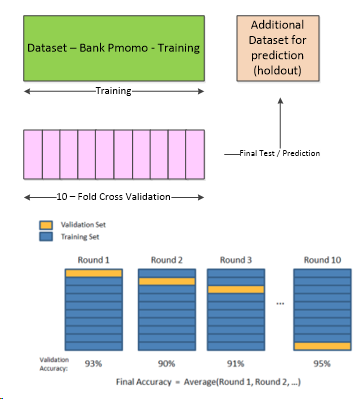

Source : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

Reasons for using k-fold for splitting the data versus Shuffle split
•	This data set is balanced and in 10-fold, the data is randomly divided into ten folds. In Each iteration, 1 fold is used for cross validation and 9 folds are used for training. 
•	ShuffleSplit will randomly sample the entire dataset during each iteration to generate a training set and a test set. Since we are sampling from the entire dataset during each iteration, values selected during one iteration, could be selected again during another iteration. Whereas in K-fold the test data is different in each fold. This makes the model more robust.


In [7]:
# Training and Test Split
# Since housing is a balanced dataset ( with 56% yes and 44% No , we will use simple KFold and ShuffleSplit cv objects)
from sklearn.model_selection import KFold
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

if 'Target' in bankPromoModel_hsng_Df:
    y = bankPromoModel_hsng_Df['Target'].values # get the labels we want
    del bankPromoModel_hsng_Df['Target']        # get rid of the class label
    X = bankPromoModel_hsng_Df.values           # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# To use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_cv_iterations = 10
kfold_cv_object = KFold(n_splits=num_cv_iterations , shuffle = False , random_state=999)
#n_splits=num_cv_iterations,test_size  = 0.2, random_state=999
                         
print(kfold_cv_object)


KFold(n_splits=10, random_state=999, shuffle=False)


In [8]:
from sklearn.model_selection import ShuffleSplit
# To use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_cv_iterations = 10
shuffle_cv_object = ShuffleSplit(n_splits=num_cv_iterations, test_size = 0.1, random_state=999)
                         
print(shuffle_cv_object)


ShuffleSplit(n_splits=10, random_state=999, test_size=0.1, train_size=None)


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
#from sklearn import metrics as mt

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel = make_pipeline(StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores_kfold = cross_validate(logisticModel , X, y=y , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_kfold))
display(pd.DataFrame(scores_kfold).mean())
end = datetime.now()
print("time taken for Logistic Regression with Kfold cv object")
print(end-start)
print()

start = datetime.now()
scores_shuffle = cross_validate(logisticModel , X, y=y , cv = shuffle_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_shuffle))
display(pd.DataFrame(scores_shuffle).mean())
end = datetime.now()
print("time taken for Logistic Regression with Shuffle cv object")
print(end-start)
print()

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,1.450316,0.081682,0.944613,0.744731,0.574595,0.816525,0.895179,0.735653,0.897026,0.745085,0.997532,0.744378
1,1.145355,0.032569,0.853853,0.751690,0.585188,0.824778,0.752931,0.745441,0.908155,0.759814,0.805679,0.743738
2,1.383156,0.082950,0.500095,0.809596,0.627755,0.842207,0.418491,0.771393,0.343252,0.786260,0.920868,0.834360
3,1.211065,0.064512,0.088985,0.800577,0.538850,0.849564,0.438399,0.779258,0.553571,0.802252,0.048381,0.798910
4,1.630997,0.108196,0.245889,0.792216,0.669035,0.821917,0.786994,0.748071,0.583643,0.775076,0.155754,0.810132
5,1.315789,0.110831,0.589965,0.786047,0.761793,0.834171,0.685468,0.757459,0.718904,0.786781,0.500244,0.785315
6,1.980634,0.113945,0.455639,0.792433,0.696505,0.838219,0.629507,0.761637,0.705231,0.781841,0.336534,0.803315
7,3.372326,0.025399,0.878076,0.754189,0.772716,0.822239,0.807122,0.742910,0.891286,0.762158,0.865252,0.746384
8,1.826371,0.103036,0.900643,0.760999,0.843795,0.821424,0.846273,0.741927,0.857376,0.755513,0.948509,0.766564
9,1.895442,0.112552,0.377330,0.800705,0.646789,0.829805,0.630613,0.758245,0.292317,0.784790,0.532072,0.817279


fit_time           1.721145
score_time         0.083567
test_F1_Score      0.583509
train_F1_Score     0.779318
test_AUC           0.671702
train_AUC          0.830085
test_Accuracy      0.689098
train_Accuracy     0.754199
test_Precision     0.675076
train_Precision    0.773957
test_Recall        0.611083
train_Recall       0.785038
dtype: float64

time taken for Logistic Regression with Kfold cv object
0:00:05.363525




,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,1.012601,0.089961,0.775268,0.778873,0.827495,0.829789,0.749226,0.752341,0.772817,0.773088,0.777734,0.784745
1,0.964331,0.072015,0.788132,0.777873,0.835868,0.828969,0.764706,0.750915,0.783452,0.771800,0.792869,0.784042
2,1.537508,0.222131,0.781732,0.778234,0.838677,0.828603,0.755860,0.751505,0.779882,0.771818,0.783591,0.784757
3,0.961437,0.031959,0.782011,0.778980,0.833091,0.829254,0.754533,0.751923,0.767836,0.772082,0.796719,0.786002
4,1.520893,0.205520,0.787298,0.777795,0.838792,0.828522,0.764485,0.750424,0.781833,0.770829,0.792840,0.784888
5,1.124076,0.167221,0.782333,0.777182,0.831703,0.829384,0.756966,0.750694,0.785601,0.771488,0.779093,0.782961
6,1.517634,0.234770,0.774514,0.778807,0.824351,0.830311,0.748784,0.751702,0.763302,0.772398,0.786060,0.785323
7,1.042382,0.117676,0.784175,0.778467,0.830246,0.829594,0.756303,0.751604,0.776270,0.771416,0.792244,0.785648
8,1.107462,0.163794,0.768526,0.779437,0.823310,0.830286,0.743034,0.752734,0.761247,0.773889,0.775945,0.785064
9,1.280469,0.254053,0.771485,0.779353,0.821751,0.830526,0.744803,0.752587,0.762128,0.773370,0.781075,0.785430


fit_time           1.206879
score_time         0.155910
test_F1_Score      0.779547
train_F1_Score     0.778500
test_AUC           0.830528
train_AUC          0.829524
test_Accuracy      0.753870
train_Accuracy     0.751643
test_Precision     0.773437
train_Precision    0.772218
test_Recall        0.785817
train_Recall       0.784886
dtype: float64

time taken for Logistic Regression with Shuffle cv object
0:00:03.056319



In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel2 = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores_kfold2 = cross_validate(logisticModel2 , X, y=y , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_kfold2))
display(pd.DataFrame(scores_kfold2).mean())
end = datetime.now()
print("time taken for Logistic Regression with Kfold cv object")
print(end-start)
print()

start = datetime.now()
scores_shuffle2 = cross_validate(logisticModel2 , X, y=y , cv = shuffle_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_shuffle2))
display(pd.DataFrame(scores_shuffle2).mean())
end = datetime.now()
print("time taken for Logistic Regression with Shuffle cv object")
print(end-start)
print()

KeyboardInterrupt: 

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

## polynomial of degree 3

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel3 = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores_kfold3 = cross_validate(logisticModel3 , X, y=y , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_kfold3))
display(pd.DataFrame(scores_kfold3).mean())
end = datetime.now()
print("time taken for Logistic Regression with Kfold cv object")
print(end-start)
print()

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGKILL(-9)}

In [12]:
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel_hsng = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', C=1.0,\
                                                                   class_weight=None, random_state=999, \
                                                                   solver='liblinear'))

# Fit the whole training dataset now, since validation would be done on additional dataset
logisticModel_hsng.fit(X,y) 


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=999, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

### Determine weights of the of the model features

month_aug has weight of -0.8218628950391069
month_jun has weight of -0.5133341448160301
age has weight of -0.34770226933321735
month_jul has weight of -0.33220739932727494
month_feb has weight of -0.30404985578636573
job_student has weight of -0.22988748239885679
month_jan has weight of -0.22253849443036647
month_sep has weight of -0.21539655032188795
month_oct has weight of -0.21510749445317282
Subscribed_yes has weight of -0.21215548328157324
marital_single has weight of -0.20484945430155518
job_retired has weight of -0.20184431125055394
job_unknown has weight of -0.17482419363925225
month_mar has weight of -0.16931229467715017
month_nov has weight of -0.15485144923926913
month_dec has weight of -0.13779270226243612
poutcome_success has weight of -0.129397873403932
day has weight of -0.11747150978928093
job_housemaid has weight of -0.10265694596297165
job_unemployed has weight of -0.09149545724925516
contact_telephone has weight of -0.06990443794177106
education_unknown has weight of

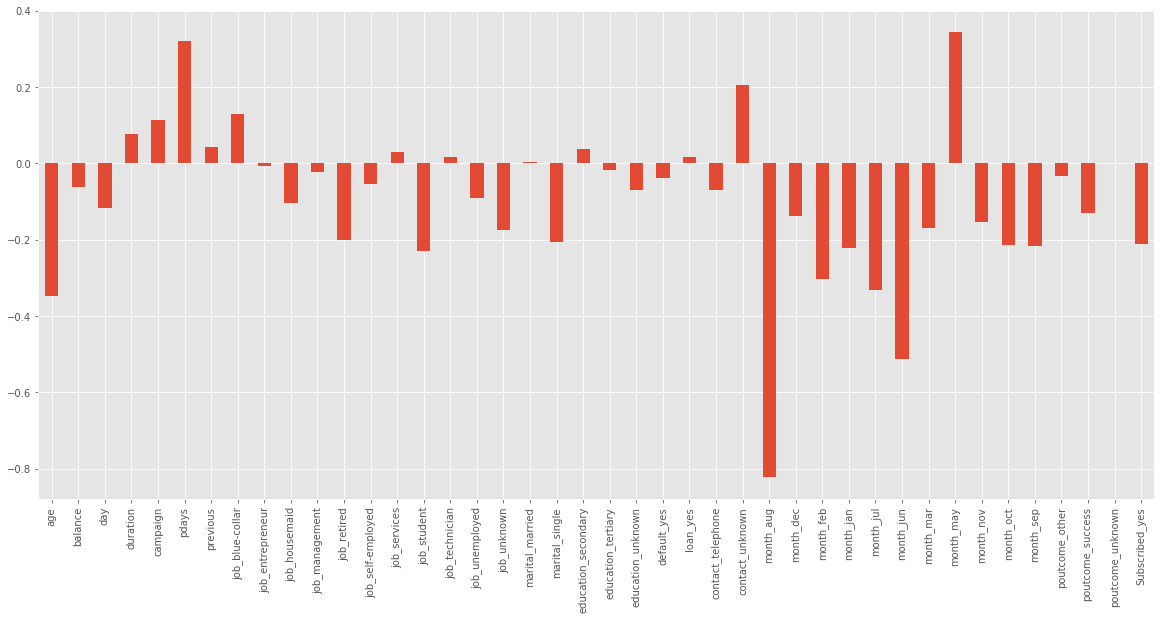

In [13]:
classifier_model = logisticModel_hsng.named_steps['logisticregression']
# sort these attributes and spit them out
zip_vars = zip(classifier_model.coef_.T, bankPromoModel_hsng_Df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0])

plt.style.use('ggplot')
plt.figure(figsize=(20,9))
weights = pd.Series(classifier_model.coef_[0],index=bankPromoModel_hsng_Df.columns)
weights.plot(kind='bar')
plt.show()

### Feature Importance Analysis

Based on the magnitude of the coefficients in above plot features- Month_Aug, Month_Jun, Age, Month_May, Month_Jul and PDays are among the most important features.

As identified during the EDA in Lab 1, the clients could be contacted over a few months, but each of the months listed corresponds to the last month the client was contacted.  The months that affect the housing model the most are August, June, May and July.   It is necessary to note the difference between the housing and the subscribe models - the subscribe model does not weight any months with a high coefficient until the fifth variable.  Also, most of the months in the housing model have negative coeffecients where the subscribe model are equally distributed between the months. 

The age of the client, which is the first non-month feature, is in the top 6.  The age of prospective clients for home loans sounds as if that feature would be significant, for example a 30 year old person is more likely to have a home loan as compared to an 18 year old.  

Pdays is the last feature we will mention as significant (we were going to only mention the top 5 but continued until the next non-month attribute).  Pdays is also the first non-month attribute to have a positive coefficient with Month_May being the only other feature mentioned here.  Pdays is the number of days of contact between the current marketing campaign and a previous campaign.  From the EDA in Lab 1, we discovered that 80% of the clients in this campaign were new to marketing campaigns from the bank.  The right skewness of the data for this feature could have affected the singifance into the model.

### Performing Grid Search

In [16]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.exceptions import DataConversionWarning


param_grid = {
     'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C' : np.logspace(-4, 4, 50),
    'logisticregression__solver' : ['liblinear']
   }


scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Create grid search object

grid = GridSearchCV(make_pipeline(StandardScaler(), LogisticRegression(random_state=999, class_weight=None)), \
                   param_grid = param_grid, cv = kfold_cv_object , verbose=False, n_jobs=-1, scoring=scoring, refit='Accuracy', \
                   return_train_score=True)

# Fit on data

grid.fit(X, y=y)
  
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'logisticregression__C': 75.43120063354607, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'} with a score of 0.69


In [15]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.exceptions import DataConversionWarning


param_grid = {
     'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C' : np.logspace(-4, 4, 50),
    'logisticregression__solver' : ['liblinear']
   }


scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Create grid search object

grid = GridSearchCV(make_pipeline(StandardScaler(), LogisticRegression(random_state=999, class_weight=None)), \
                   param_grid = param_grid, cv = shuffle_cv_object , verbose=False, n_jobs=-1, scoring=scoring, refit='Accuracy', \
                   return_train_score=True)

# Fit on data

grid.fit(X, y=y)
  
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'logisticregression__C': 0.0020235896477251557, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'} with a score of 0.75


In [13]:
# create dataframes on selected features
## based on 2 methods 18 features
bankPromoModel_hsng218_Df = bankPromo_df.copy()
bankPromoModel_hsng218_Df['Target'] = bankPromoModel_hsng218_Df['housing'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoModel_hsng218_Df['Target'] = bankPromoModel_hsng218_Df['Target'].astype(np.int)

# Delete the original 'housing' column
del bankPromoModel_hsng218_Df['housing']
del bankPromoModel_hsng218_Df['default']
del bankPromoModel_hsng218_Df['previous']
del bankPromoModel_hsng218_Df['marital']
del bankPromoModel_hsng218_Df['duration']
del bankPromoModel_hsng218_Df['day']
del bankPromoModel_hsng218_Df['campaign']
del bankPromoModel_hsng218_Df['balance']


# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars218 = list()
# List to hold names of numerical variables
numericalVars218 = list()

for colName in bankPromoModel_hsng218_Df.columns:
    if bankPromoModel_hsng218_Df[colName].dtype == np.int64:
        numericalVars218.append(colName)
    elif bankPromoModel_hsng218_Df[colName].dtype == np.object:
        categoricalVars218.append(colName)
    else:
        pass
    
# Remove Target column from final categorical Var list
#categoricalVars618.remove('Target')

print(numericalVars218)
print(categoricalVars218)

# Convert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars218:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoModel_hsng218_Df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoModel_hsng218_Df = pd.concat((bankPromoModel_hsng218_Df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoModel_hsng218_Df.drop(categoricalVars218, inplace=True, axis=1)
bankPromoModel_hsng218_Df.info()

['age', 'pdays', 'Target']
['job', 'education', 'loan', 'contact', 'month', 'poutcome', 'Subscribed']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
age                    45211 non-null int64
pdays                  45211 non-null int64
Target                 45211 non-null int64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
education_secondary    45211 non-null uint8
education_tertiary     45211 non-null uint8
education_unknown      45211 non-null uint8
loan_yes               45211 non-null uin

### Deployment of Models for Task 1 and Task 2

The models that we have derived, for both home loans and subscription to term deposits,  are of interest to the bank.  Banks, similar to other businesses, have a business case to increase customer base (or increase what current customers use the bank for) without increasing (or decrease) their customer acquisition cost.  We have focused on building predictive models for existing bank customers and would not affect the acquisiton cost for new customers.

In order to benefit the bank's sales, the banks could use these models to increase probability of the customers they phone that ultimately will subscribe to a term deposit or invest in a home.  This reduces the number of phone calls, reduces the hours that are paid to the bankers to make those phone calls and increases the probaility of the banks earning interest on the term deposits or home loans.

We would encourage the bankers to continue to enter the data in order to refine the model at a later date.  Market changes could effect the models' accuracy and continuing to collect data will make it simplier to refine for the next campaign.  Since the models do not need to be used for each phone call, the use of the model can be deployed to a few people in the bank and then the list of more likely candidates be distributed to the bankers that will be contacting the existing customers.  The use of the models could also be added to the process during signing up new customers.  The bank could run the model on the attributes of the new customer and then make offers on the spot if the model shows the determined level of probability. 

The attribute that we believe would refine the models even further and increase the models' performance is income.  Income is important to home loans as it shows purchasing power on average homes in the neighborhood.  Income is important to term deposits as it is an indicator on disposable income of the customers to save more. 

The model could be refined in any time intervals, but at a minimum the model should be updated significant change in the market or national interst rate adjustments.

Note:  We have no evidence that these models can be extrapolated to other banks in Portugal or other countries.  (Despite us not knowing the randomness of the sample or the calls, we are going to assume that they were random in this case and we can use the model to predict the subscribe or housing outcomes to the entire bank population).
